In [1]:
%matplotlib inline
from ResonatorNotebookF import * #import self made function

import numpy as np
import ipywidgets as wdg
import requests
from IPython.display import Image, display

<font size="8">Table of contents</font>
<blockquote>
<ul>
<li><a href="#CPW" style="text-decoration: none" ><font size="5" color="k">Coplanar Waveguide</font></a></li><br>
<li><a href="#Resonator" style="text-decoration: none" ><font size="5" color="k">CPW Resonator</font></a></li><br>
<li><a href="#Qfactor" style="text-decoration: none" ><font size="5" color="k">Q factor</font></a></li><br>
<li><a href="#Model" style="text-decoration: none" ><font size="5" color="k">Theory model</font></a></li><br>
<li><a href="#DesignByPython" style="text-decoration: none" ><font size="5" color="k">Design Resonator by Python Code</font></a></li><br>

<li><a href="#Simulation" style="text-decoration: none" ><font size="5" color="k">Simulation by using ANSYS HFSS</font></a></li><br>
<li><a href="#Fab" style="text-decoration: none" ><font size="5" color="k">Fabrication recipe</font></a></li>
<ul>
</blockquote>
<hr size="10" color="k">

<a id='CPW'></a>
# Coplanar Waveguide : 
<table border="0">
　<tr>
　<td><img src="pic/coplanar.png" width="400"></td>
　<td><img src="pic/coplanar_model.png" width="400"></td>
　</tr>
</table><br>
<center><font size="3">fig 1  &nbsp; 1.a Coplanar waveguide model &nbsp; 1.b Equivalent circuit</font></center>
<font size="3"> Coplanar waveguide (CPW) is a type of electrical transmission line,it has several advantages 
: simplifies fabrication,low radiation loss, low dispersion and flexible design , this kind of transmission line can support even or odd quasi-TEM modes [fig 2] .</font>
<img src="pic/CPW_QuasiTEM.gif" width="400">
<center><font size="3">fig 2. Coplanar waveguide - Quasi TEM modes</font></center><br>
<font size="3"> For microwave signal transmission, the impedance between device need to be match, otherwise signal will be reflect (1), most common transmission line and instrument port standard is 50Ω, so when we design CPW device 50Ω is the goal . </font><br><br>
$$ \Gamma \ (reflection \ coefficient) = \frac{Z_L-Z_0}{Z_L+Z_0}\ (1) $$
<br><font size="3"> About impedance matching, I recommand this website <a href="http://wcalc.sourceforge.net/cgi-bin/coplanar.cgi">Coplanar Waveguide Analysis/Synthesis Calculator</a><br> 
<blockquote>How To Use : 
<br> 1. Fill in Metal width/spacing/thickness and Substrate thickness/dielectric constant/loss tangent. 
<br> 2. Pust "analyze" 
<br> 3. Check "Characteristic Impedance",Try to approach 50Ω by adjust Metal width and spacing
<br> 4. After matching, record Metal width, Metal spacing , Ls, Cs at box below for follow up program
<br>Tips : Impedance near 50Ω when Metal width and spacing is 2 to 1,
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Metal width recommand nearby 10um, too small will have bigger kinetic inductance </blockquote></font><br><br>
<font size="2">
Figure quote: <br>
fig 1 wcalc.sourceforge.net/cgi-bin/coplanar.cgi <br>
fig 2 www.imst.com/coplan/online_manual/useful_hints.html
</font>
  





In [2]:
### Parameter Setup
cpw_pinw = 10.0 # This is Metal width
cpw_gapw = 4.8 # This is Metal spacing
LRCG_Ls = 397.161 * 10 ** -9 # Ls in LRCG model
LRCG_Cs = 158.297 * 10 ** -12 # Cs in LRCG model

Res = Resonator(LRCG_Ls, LRCG_Cs, cpw_pinw, cpw_gapw)

<a id='Resonator'></a>
# CPW Resonator :

<img src="pic/2PResonator.png">
<center><font size="3">fig 1  &nbsp;Two-port CPW resonator model </font></center>



### Start from 
$$\lambda = \frac{1}{Frequency\sqrt{Cs\cdot Ls}}$$

### For resonator two open end
$$Length = \frac{\lambda}{2} = \frac{1}{2\cdot Frequency\sqrt{Cs\cdot Ls}}$$
### For resonator one side open, one side close
$$Length = \frac{\lambda}{4} = \frac{1}{4\cdot Frequency\sqrt{Cs\cdot Ls}}$$

<font size="2">
Figure quote: <br>
fig 1 Circuit Quantum Electrodynamics with Electrons on Helium (Andreas Arnold Fragner,2013) P.61 <br>

</font>

For n=1 Frequency = 5.00 GHz, Resonator Length = 12611.90 um 


<function ipywidgets.widgets.interaction.<lambda>>

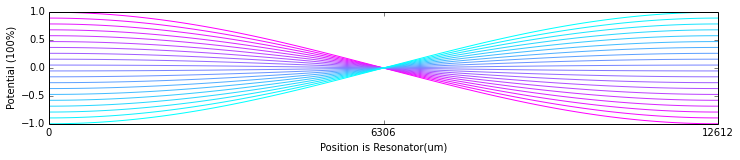

In [3]:
### Length Calcuate
wdg.interact(Res.LengthCal,Freq=(0+0.25,10,0.25))

<a id='Qfactor'></a>
# Q Factor


### Loaded Q
<img src="pic/Qfactor.png" height="490" width="372">

$$Q_L=\frac{Center\ Frequency}{Bandwidth\ (3dB\ down)}$$

### Unload Q and External Q


$$\frac{1}{Q_L} = \frac{1}{Qo}+\frac{1}{Qe}$$
$$\ $$
$$Q_L\ =\ Loaded\ Q,\quad Qo\ =\ Unloaded Q,\quad Qe\ =\ External\ Q$$
###### From "Circuit Quantum Electrodynamics with Electrons on Helium by Andreas Arnold Fragner" P.68
---


<a id='Model'></a>
# Theory model
<br>
### Hanger Resonator
$$S21(f) = \frac{-2Q_L Q_e+Q_e^2+Q_L^2 (1+Q_e^2 \cdot(2a+b)^2)}{Q_e^2 \cdot (1+4Q_L^2 a^2)}\quad (Watt)$$
<br>
$$a = \frac{f-(f_0+df)}{f_0 + df}\ \ ,\ \ b = \frac{2df}{f_0}$$
<br>
$$Q_L\ =\ Loaded\ Q,\quad Qe\ =\ External\ Q,\quad f_0 =\ Resonance\ frequency, \quad $$
### Two port Resonator
construction

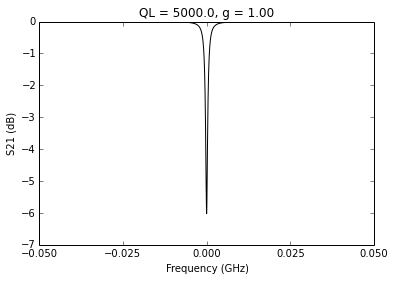

<function ipywidgets.widgets.interaction.<lambda>>

In [4]:
### Q factor simulate
wdg.interact(Res.Qfactor_simulator,Type=['Hanger','TwoPort'], Freq=(0,10000,1000), Qo=(0,1000000), Qe=(0,1000000)\
                               , Swp_F={'1MHz':1,'10MHz':10,'100MHz':100,'1GHz':1000,'10GHz':10000,'100KHz':0.1})

<a id='DesignByPython'></a>
# Design Resonator by Python Code

<a id='Simulation'></a>
# Simulation
<ul><li><font size="5">Using ANSYS HFSS : </font></li>
<ul><li><font size="4">Open "ANSYS Electronics Desktop" </font></li>
<li><font size="4"> Click "HFSS" create a new simulation </font></li>
<li><font size="4"> right click select "simulation type?", select "Eigenmode" </font></li>
<li><font size="4"> Import your dxf. file </font></li>
<li><font size="4"> Delete useless port, circuit and symbol (This can reduce simulation time) </font></li>
<li><font size="4"> Create a matel surface by create a rectangle and subtract your design  </font></li>
<li><font size="4"> Create a sapphire(yout substrate) box </font></li>
<li><font size="4"> Create a vaccum box(double thickness than substrate)</font></li>
<li><font size="4"> Create two port by Boundary -> Assign -> LumpedRLC -> set R=50 and create Line</font></li>
<li><font size="4"> Select Matel surface -> Asssign Perfect E </font></li>
<li><font size="4"> Select Substrate choose material </font></li>
<li><font size="4"> Analysis -> Add solution setup -> setup and run! </font></li>
<li><font size="4"> Wait and record result !!! </font></li>
<br>
<li><font size="4"> Can also get E field anime by plot Fields -> E ->Mag E ->FieldOverlays ->select object -> Anime  </font></li>
</ul></ul>
<br>

<a id='Fab'></a>
# Fabrication
## Recipe - SchusterLab
<ul><li><font size="5">Prepare</font></li>
    <ul><li><font size="4">Bake Sapphire wafer 12 hr @900℃</font></li>
    <li><font size="4">Clean the wafer : </font></li>
        <ul><li><font size="4">Acetone 2 min @Sonication</font></li>
        <li><font size="4">IPA 2 min @Sonication</font></li>
        <li><font size="4">DI water clean 1 min </font></li>
        <li><font size="4">Bake 2 min @115℃</font></li>
        <li><font size="4">Cooldown 1 min</font></li>
</ul></ul></ul>
<ul><li><font size="5">Evaporation</font></li>
    <ul><li><font size="4">Pump to 10<sup>-6</sup> mbar</font></li>
    <li><font size="4">Open gate between chamber, reduce pressure to 10<sup>-7</sup> mbar</font></li>
    <li><font size="4">Evaporate Ti : 0.2nm/s | 48mA , reduce pressure to 10<sup>-8</sup> mbar</font></li>
    <li><font size="4">Evaporate Nb : 0.9nm/s | 290mA to required thickness</font></li>
    <li><font size="4">O2 3mbar for 5 min (For condition fixed)</font></li>
</ul></ul>
<ul><li><font size="5">Spinner</font></li>
<ul><li><font size="4">Clean the wafer : </font></li>
        <ul><li><font size="4">Acetone 2 min @Sonication</font></li>
        <li><font size="4">IPA 2 min @Sonication</font></li>
        <li><font size="4">DI water clean 1 min </font></li>
        <li><font size="4">Bake 2 min @115℃</font></li>
        <li><font size="4">Cooldown 1 min</font></li>
</ul><li><font size="4">Spinner recipe - AZ mir 703</font></li>
<li><font size="4">Spinner recipe - S1813</font></li>
</ul></ul>

<ul><li><font size="5">Maskless Aligner (MLA150)</font></li>
<ul><li><font size="4">Set up: </font></li>
<ul><li><font size="4">Laser wavelength : 405</font></li>
<li><font size="4">Dose (mJ/cm<sup>2</sup>) : 65 for AZ703, 100 for S1813 </font></li>
<li><font size="4">Defoc : -3 </font></li>
</ul></ul></ul>


# construction

<ul><li><font size="5">Development</font></li>
</ul>
<ul><li><font size="5">Etch</font></li>
</ul>
<ul><li><font size="5">Strip</font></li>
</ul>